# Global Power Plant Database Exploration

### Should we put our names and get the names of the other people to put here?

## About the Data

The Global Power Plant Database is an open-source, open-access dataset of grid-scale (1 MW and greater) electricity generating facilities operating across the world. This database was created by World Resources Institute (WRI) personel and other experts by gathering data from government and independent sources to represent about 72% of the world's capacity.

More information on how the data was gathered and compiled can be found within the 'data' folder on our github repository from the authors at https://github.com/jlstjohn/coil_project.

## Motivation

As it has become more and more apparent that humans have a direct impact on climate change, the need for reliable and evironmentally sustainable power to sustain modern society has become a major focus of research. There have been exhaustive studies on how various types of fuel and their emissions impact their surrounding environment, studies on water availabilty and the effect building certain types of plants (like nuclear plants) in an area would affect water supply, and scientist are also researching hybrid plants (using more than one type of fuel to generate power).

## Research Question

Our research question that we initially set out to solve was: Where are there additional opportunities for renewable energy?

### maybe change or add something about how the exploration led us elsewhere?

## Brief Look at Fields in GPP Dataset

Fields:

	- `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
	- `country_long` (text): longer form of the country designation
	- `name` (text): name or title of the power plant, generally in Romanized form
	- `gppd_idnr` (text): 10 or 12 character identifier for the power plant
	- `capacity_mw` (number): electrical generating capacity in megawatts
	- `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
	- `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
	- `primary_fuel` (text): energy source used in primary electricity generation or export
	- `other_fuel1` (text): energy source used in electricity generation or export
	- `other_fuel2` (text): energy source used in electricity generation or export
	- `other_fuel3` (text): energy source used in electricity generation or export
	- `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
	- `owner` (text): majority shareholder of the power plant, generally in Romanized form
	- `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
	- `url` (text): web document corresponding to the `source` field
	- `geolocation_source` (text): attribution for geolocation information
	- `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
	- `year_of_capacity_data` (number): year the capacity information was reported
	- `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
	- `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
	- `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
	- `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
	- `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
	- `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
	- `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
	- `generation_data_source` (text): attribution for the reported generation information
	- `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013 (see [2])
	- `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 (see [2])
	- `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 (see [2])
	- `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 (see [2])
	- `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 (see [2])
	- `estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013 (see section on this field below)
	- `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 (see section on this field below)
	- `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015 (see section on this field below)
	- `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016 (see section on this field below)
	- `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 (see section on this field below)

# Data Cleaning

Before performing any analysis on the data, it was important to look at and understand each field.

The following is taken from the README file:

- "Caveats: `primary_fuel` is the fuel that has been identified to provide the largest portion of generated electricity for the plant or has been identified as the primary fuel by the data source.
For power plants that have data in multiple `other_fuel` fields, the ordering of the fuels should not be taken to indicate any priority or preference of the fuel for operating the power plant or generating units.
Though the `other_fuel` columns in the database are numbered sequentially from 1, the ordering is insignificant."

Based off of this information, we will combine the three columns ('other_fuel1', 'other_fuel2', 'other_fuel3') into one column and evaluate renewable energy possiblities from there (in terms of additional locations). Main focus will be on the 'primary_fuel' column. Additionally, a column called 'is_renewable' will be created based off of the 'primary_fuel' column.

Columns deemed not needed for this exploration will be dropped.

In [36]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
#import plotnine as pl

In [2]:
# import data
gpp_data = pd.read_csv('global_power_plant_database.csv')
gpp_data.head()

C:\Users\farrj\AppData\Local\Temp\ipykernel_13068\4285618492.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  gpp_data = pd.read_csv('global_power_plant_database.csv')


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [3]:
# drop uneccesary columns
remove_cols = ['name', 'commissioning_year', 'owner', 'source', 'url', 'geolocation_source', 'wepp_id', 'generation_data_source', 'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014', 'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016', 'estimated_generation_gwh_2017', 'estimated_generation_note_2013', 'estimated_generation_note_2014', 'estimated_generation_note_2015', 'estimated_generation_note_2016', 'estimated_generation_note_2017']
gpp_data.drop(columns= remove_cols, inplace= True)
gpp_data.head()

,country,country_long,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,AFG,Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,NaN,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,NaN,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,NaN,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# create 'other_fuel' column
cols = ['other_fuel1', 'other_fuel2', 'other_fuel3']
gpp_data['other_fuel'] = gpp_data[cols].apply(lambda x: ', '.join(x.dropna().astype(str)), axis= 1)
gpp_data = gpp_data.drop(cols, axis= 1)
gpp_data.head()

,country,country_long,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,other_fuel
0,AFG,Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
1,AFG,Afghanistan,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
2,AFG,Afghanistan,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
3,AFG,Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
4,AFG,Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


In [5]:
# look at types of fuel sources
gpp_data.primary_fuel.value_counts()

primary_fuel
Solar             10665
Hydro              7156
Wind               5344
Gas                3998
Coal               2330
Oil                2320
Biomass            1430
Waste              1068
Nuclear             195
Geothermal          189
Storage             135
Other                43
Cogeneration         41
Petcoke              12
Wave and Tidal       10
Name: count, dtype: int64

In [6]:
# create 'is_renewable' column
renewable_list = ['Hydro', 'Solar', 'Waste', 'Biomass', 'Wave and Tidal','Geothermal','Storage', 'Cogeneration','Wind']

def is_renewable(x, ren):
    return True if x in ren else False

gpp_data["is_renewable"] = gpp_data["primary_fuel"].apply(is_renewable, ren = renewable_list)
gpp_data.head()

,country,country_long,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,other_fuel,is_renewable
0,AFG,Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,True
1,AFG,Afghanistan,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,True
2,AFG,Afghanistan,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,True
3,AFG,Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,True
4,AFG,Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,True


In [7]:
# create 'possible_renewable' column
gpp_data["possible_renewable"] = gpp_data["other_fuel"].apply(is_renewable, ren = renewable_list)
gpp_data.head()

,country,country_long,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,other_fuel,is_renewable,possible_renewable
0,AFG,Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,True,False
1,AFG,Afghanistan,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,True,False
2,AFG,Afghanistan,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,True,False
3,AFG,Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,True,False
4,AFG,Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,True,False


Additionally, we need to check for null values in our dataset.

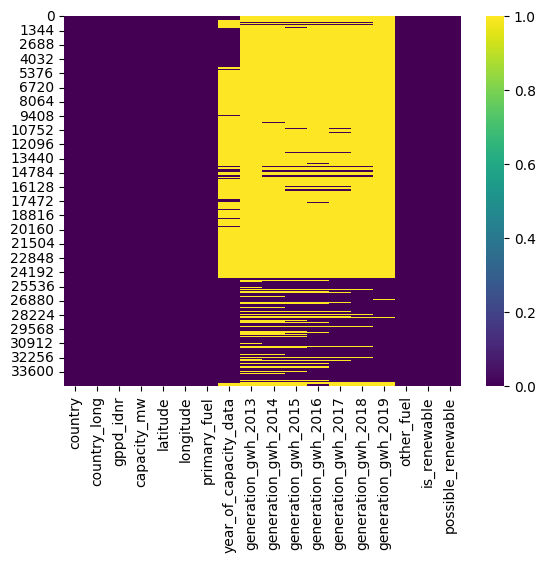

In [8]:
sns.heatmap(gpp_data.isnull(), cmap= 'viridis')
plt.show()

Due to the overwhelming amounts of missing data in the 'generation_gwh_*' columns, we will drop those as well.

The 'year_of_capacity_data' column will be kept as that information will be used later. However, at this point in time it does not make sense to fill in the null values with anything else so they will remain NaN.

In [9]:
remove_cols = ['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019']
gpp_data.drop(columns= remove_cols, inplace= True)
gpp_data.head()

,country,country_long,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,year_of_capacity_data,other_fuel,is_renewable,possible_renewable
0,AFG,Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,2017.0,,True,False
1,AFG,Afghanistan,WKS0070144,10.0,31.670,65.7950,Solar,NaN,,True,False
2,AFG,Afghanistan,WKS0071196,10.0,31.623,65.7920,Solar,NaN,,True,False
3,AFG,Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,2017.0,,True,False
4,AFG,Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,2017.0,,True,False


Now that our data is cleaned, we can begin exploring the dataset with some plots.

# Initial Data Analysis

We start by exploring a global plot of the dataset and the different types of primary fuel used by each.

C:\Users\farrj\AppData\Local\Temp\ipykernel_13068\493232104.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


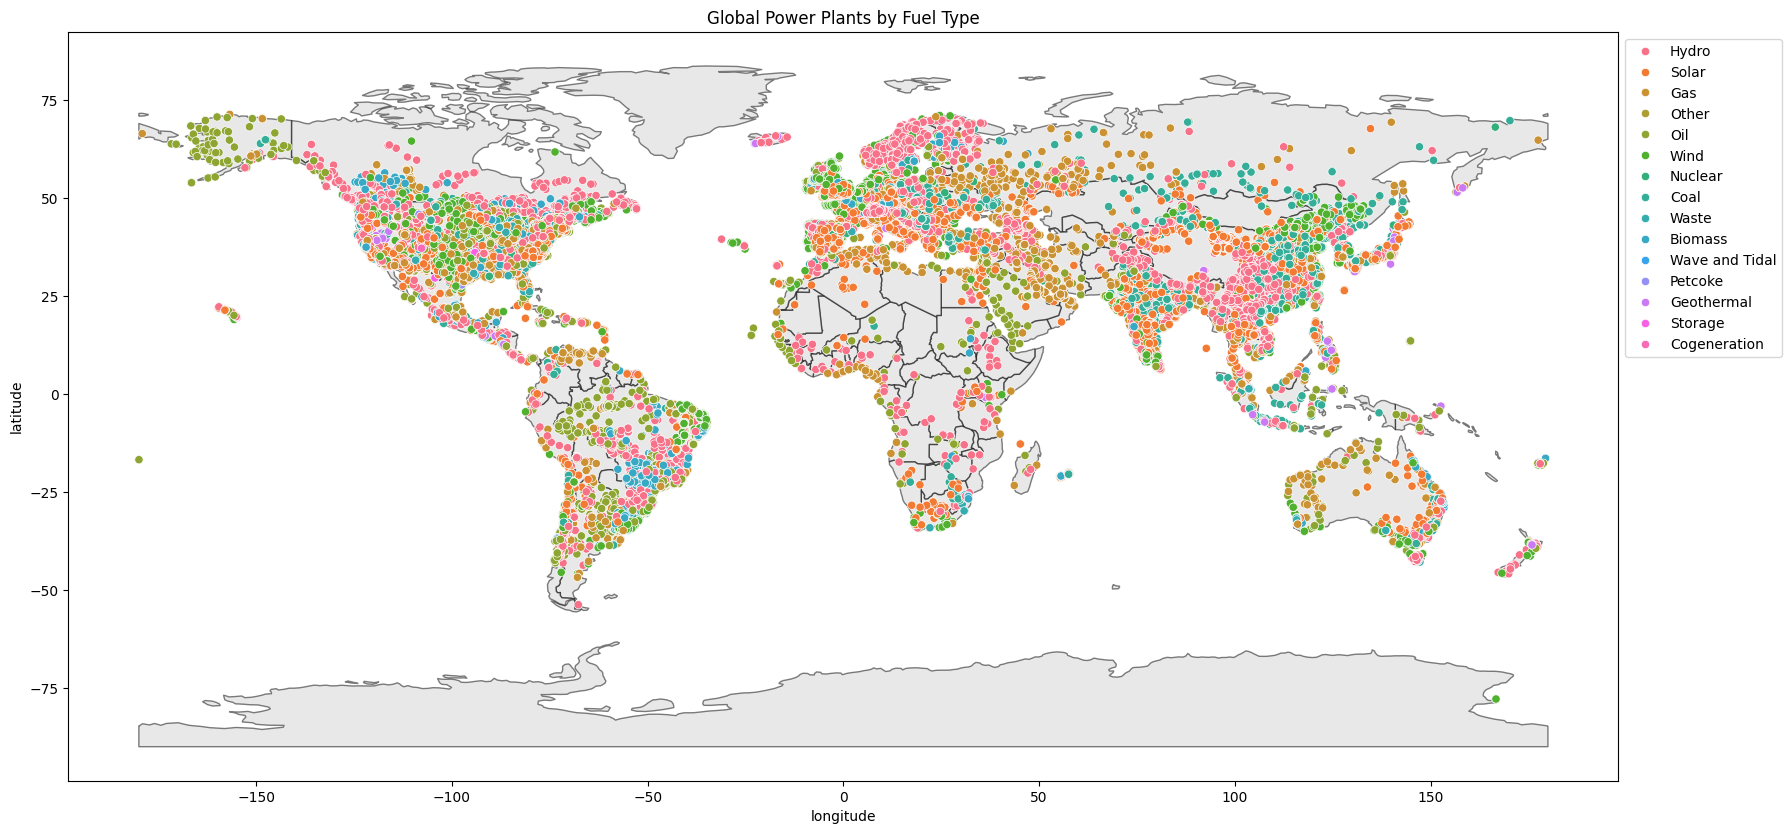

In [17]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
world.plot(
    ax=ax,
    color="lightgray",
    edgecolor="black",
    alpha=0.5
)
sns.scatterplot(data=gpp_data, y="latitude",x="longitude", hue="primary_fuel", legend="auto")
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Global Power Plants by Fuel Type')
plt.show()

# PUT OBSERVATION HERE, PROBBABLY SOMETHING RELATED TO DEVELOPED COUNTRIES HAVING A HIGHER CONCENTRATION OF PLANTS COMPARED TO UNDERDEVELOPED REGIONS

To further explore this, we decided to pull in additional data on each county: population data and the Human Development Index.

Population data will be used to calculate each country's growth rate percentage from 2013-2019 (the years covered in the Global Power Plant Database).

The Human Development Index (HDI) is "is a summary measure of average achievement in key dimensions of human development: a long and healthy life, being knowledgeable and having a decent standard of living. The HDI is the geometric mean of normalized indices for each of the three dimensions." (From https://hdr.undp.org/)

In [20]:
# pull in population data
popData = pd.read_csv("API_SP.POP.TOTL_DS2_en_csv_v2_237218.csv", skiprows=range(4), low_memory=False)

# colum_names = list(data.columns)
popData = popData[["Country Name", 'Country Code', "Indicator Name", "Indicator Code", "2000", "2009",
                    "2010", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019"]]

# popData.head()
columns_to_check = ["2000", "2009", "2010", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019"]
popData.dropna(subset=columns_to_check, how='all', inplace=True)
# popData.describe()

# check for null values
pd.isna(popData).sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
2000              0
2009              0
2010              0
2012              0
2013              0
2014              0
2015              0
2016              0
2017              0
2018              0
2019              0
dtype: int64

In [21]:
#Calc Growth Rate from 2013-2019, years for which generation data is available
def growRate(p_0, p_t, t=7):
    rate = np.log(p_0/p_t) / t
    return rate*100

#growth rate calculated all for the same country from 2013-2019
popData['Growth_rate_%'] = growRate(popData['2013'], popData['2019'])

# popData['Growth_rate_%'].describe()
popData.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2009,2010,2012,2013,2014,2015,2016,2017,2018,2019,Growth_rate_%
0,Aruba,ABW,"Population, total",SP.POP.TOTL,89101.0,99212.0,100341.0,102112.0,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,-0.486243
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,401600588.0,509410477.0,523459657.0,552530654.0,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,-2.303182
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,19542982.0,27385307.0,28189672.0,30466479.0,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,-2.574385
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,269611898.0,346475221.0,356337762.0,376797999.0,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,-2.283114
4,Angola,AGO,"Population, total",SP.POP.TOTL,16394062.0,22507674.0,23364185.0,25188292.0,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,-3.042720


In [22]:
# Merge gpp_data with popData based on the "country_long" and "Country Name" columns
gpp_data = pd.merge(gpp_data, popData[['Country Name', 'Growth_rate_%']], left_on='country_long', right_on='Country Name', how='left')

gpp_data.drop(labels="Country Name", axis=1, inplace=True)

gpp_data.head()

,country,country_long,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,year_of_capacity_data,other_fuel,is_renewable,possible_renewable,Growth_rate_%
0,AFG,Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,2017.0,,True,False,-2.574385
1,AFG,Afghanistan,WKS0070144,10.0,31.670,65.7950,Solar,NaN,,True,False,-2.574385
2,AFG,Afghanistan,WKS0071196,10.0,31.623,65.7920,Solar,NaN,,True,False,-2.574385
3,AFG,Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,2017.0,,True,False,-2.574385
4,AFG,Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,2017.0,,True,False,-2.574385


In [23]:
# pull in HDI data
#default encoding caused an error, loop to try different encodings:
# encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'utf-16']

hdiColumns = ['iso3', 'country', 'hdi_2000', 'hdi_2009', 'hdi_2010', 'hdi_2012', 'hdi_2013', 
              'hdi_2014', 'hdi_2015', 'hdi_2016', 'hdi_2017', 'hdi_2018', 'hdi_2019']

hdiData = pd.read_csv("HDR23-24_Composite_indices_complete_time_series.csv", usecols=hdiColumns, 
                      low_memory=False, encoding='latin-1')

hdiData.head()

,iso3,country,hdi_2000,hdi_2009,hdi_2010,hdi_2012,hdi_2013,hdi_2014,hdi_2015,hdi_2016,hdi_2017,hdi_2018,hdi_2019
0,AFG,Afghanistan,0.340,0.441,0.449,0.467,0.475,0.480,0.479,0.483,0.485,0.486,0.492
1,ALB,Albania,0.678,0.752,0.766,0.789,0.793,0.797,0.797,0.795,0.796,0.797,0.800
2,DZA,Algeria,0.652,0.716,0.721,0.726,0.729,0.732,0.736,0.738,0.738,0.740,0.742
3,AND,Andorra,0.815,0.859,0.863,0.867,0.851,0.854,0.856,0.859,0.860,0.863,0.865
4,AGO,Angola,0.380,0.506,0.516,0.545,0.555,0.565,0.591,0.595,0.597,0.598,0.597


In [24]:
# check for missing values
gpp_data['year_of_capacity_data'].value_counts(dropna=False)

year_of_capacity_data
NaN       20049
2019.0    10281
2017.0     3371
2016.0      781
2015.0      281
2018.0       73
2000.0       58
2014.0       20
2013.0       14
2012.0        6
2009.0        1
2010.0        1
Name: count, dtype: int64

### I think my brain is dead, how is HDI being determined for nan years?

In [25]:

nanCountryList = []
countries = {country : None for country in set(gpp_data["country"])}
switch = 0
for country in countries.keys():
    year = gpp_data['year_of_capacity_data'].loc[gpp_data["country"] == country]
    yearAve = np.mean(year)
    
    if not np.isnan(yearAve):
        yearAve = int(yearAve)
        pop = popData[str(yearAve)].loc[popData["Country Code"] == country]
        hdindex = hdiData["hdi_"+str(yearAve)].loc[hdiData["iso3"] == country]
    else:
        pop = popData.iloc[:, 8:15].loc[popData["Country Code"] == country]
        hdindex = hdiData.iloc[:,6:13].loc[hdiData["iso3"] == country]
        nanCountryList.append(country)

    countries[country] = {'HDI' : np.mean(hdindex), 'Data_year': yearAve, 'Population': np.mean(pop)}
    # if not np.isnan(year):
    #     year = str(int(year))

tempDf = pd.DataFrame(countries).T

tempDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, BHR to AZE
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   HDI         161 non-null    float64
 1   Data_year   38 non-null     float64
 2   Population  162 non-null    float64
dtypes: float64(3)
memory usage: 5.2+ KB


In [29]:
len(nanCountryList)

129

### write observation/explanation about nan values

In [30]:
# merge new data (population, growth rate, HDI) with existing dataset
gpp_data = pd.merge(gpp_data, tempDf, left_on='country', right_index=True, how='left')

gpp_data.head()

,country,country_long,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,year_of_capacity_data,other_fuel,is_renewable,possible_renewable,Growth_rate_%,HDI,Data_year,Population
0,AFG,Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,2017.0,,True,False,-2.574385,0.485,2017.0,35643418.0
1,AFG,Afghanistan,WKS0070144,10.0,31.670,65.7950,Solar,NaN,,True,False,-2.574385,0.485,2017.0,35643418.0
2,AFG,Afghanistan,WKS0071196,10.0,31.623,65.7920,Solar,NaN,,True,False,-2.574385,0.485,2017.0,35643418.0
3,AFG,Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,2017.0,,True,False,-2.574385,0.485,2017.0,35643418.0
4,AFG,Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,2017.0,,True,False,-2.574385,0.485,2017.0,35643418.0


With this new addition of data, we will now look at generation capacity by country.

In [31]:
# create a df with the desired information for easier plotting
capacities = {country : None for country in set(gpp_data["country"])}
for country in capacities.keys():
    swap = gpp_data["capacity_mw"].loc[gpp_data["country"] == country]
    population = gpp_data["Population"].loc[gpp_data["country"] == country]
    hdi = gpp_data["HDI"].loc[gpp_data["country"] == country]
    growth = gpp_data["Growth_rate_%"].loc[gpp_data["country"] == country]

    #note: growth rate is % 2013-2019
    capacities[country] = {"Capacity (MW)" : np.sum(swap), "Country" : country, "Population" : np.mean(population), 
                           "HDI": np.mean(hdi), "Growth Rate %": np.mean(growth)}

capacities = pd.DataFrame(capacities).T
capacities = capacities.sort_values(by="Capacity (MW)", ascending=False)
# capacities["Capacity (MW)"] = capacities["Capacity (MW)"].round(0)
capacities.head()

,Capacity (MW),Country,Population,HDI,Growth Rate %
CHN,1415067.38,CHN,1387067142.857143,0.749,-0.458927
USA,1204638.05,USA,328329953.0,0.933,NaN
IND,316088.546,IND,1383112050.0,0.638,-0.983095
RUS,228220.05,RUS,144163826.857143,0.826429,NaN
JPN,215365.85,JPN,127050571.428571,0.913857,0.091311


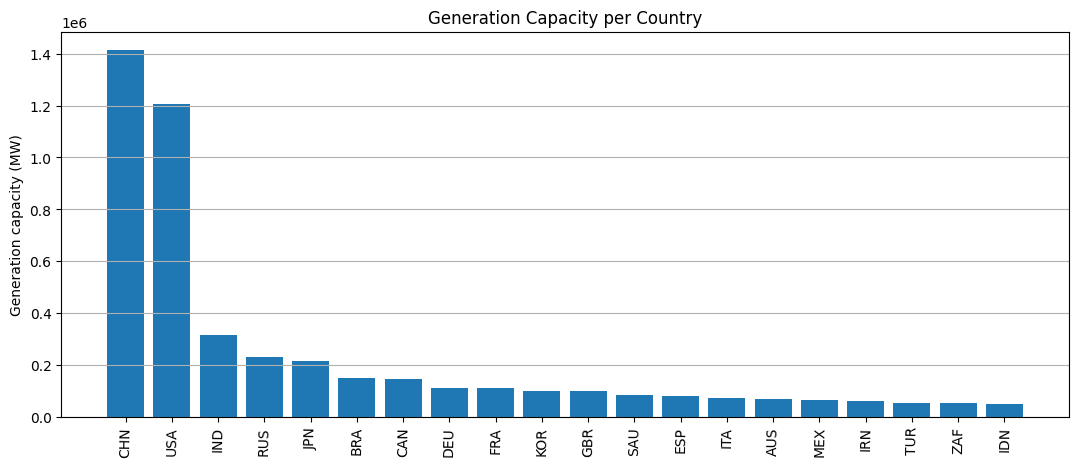

In [33]:
# We will only look at the top 20 producing countries
plt.figure(figsize=(13, 5))
plt.bar(capacities["Country"][:20], capacities["Capacity (MW)"][:20])
plt.title('Generation Capacity per Country')
plt.grid(which= 'major', axis= 'y')
plt.xticks(rotation = 89)
plt.ylabel("Generation capacity (MW)")
plt.show()

### INSERT OBSERVATION

We now look at global plots of plant locations already utilizing renewable resources as their primary fuel vs. plants that do not.

C:\Users\farrj\AppData\Local\Temp\ipykernel_13068\2403428521.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


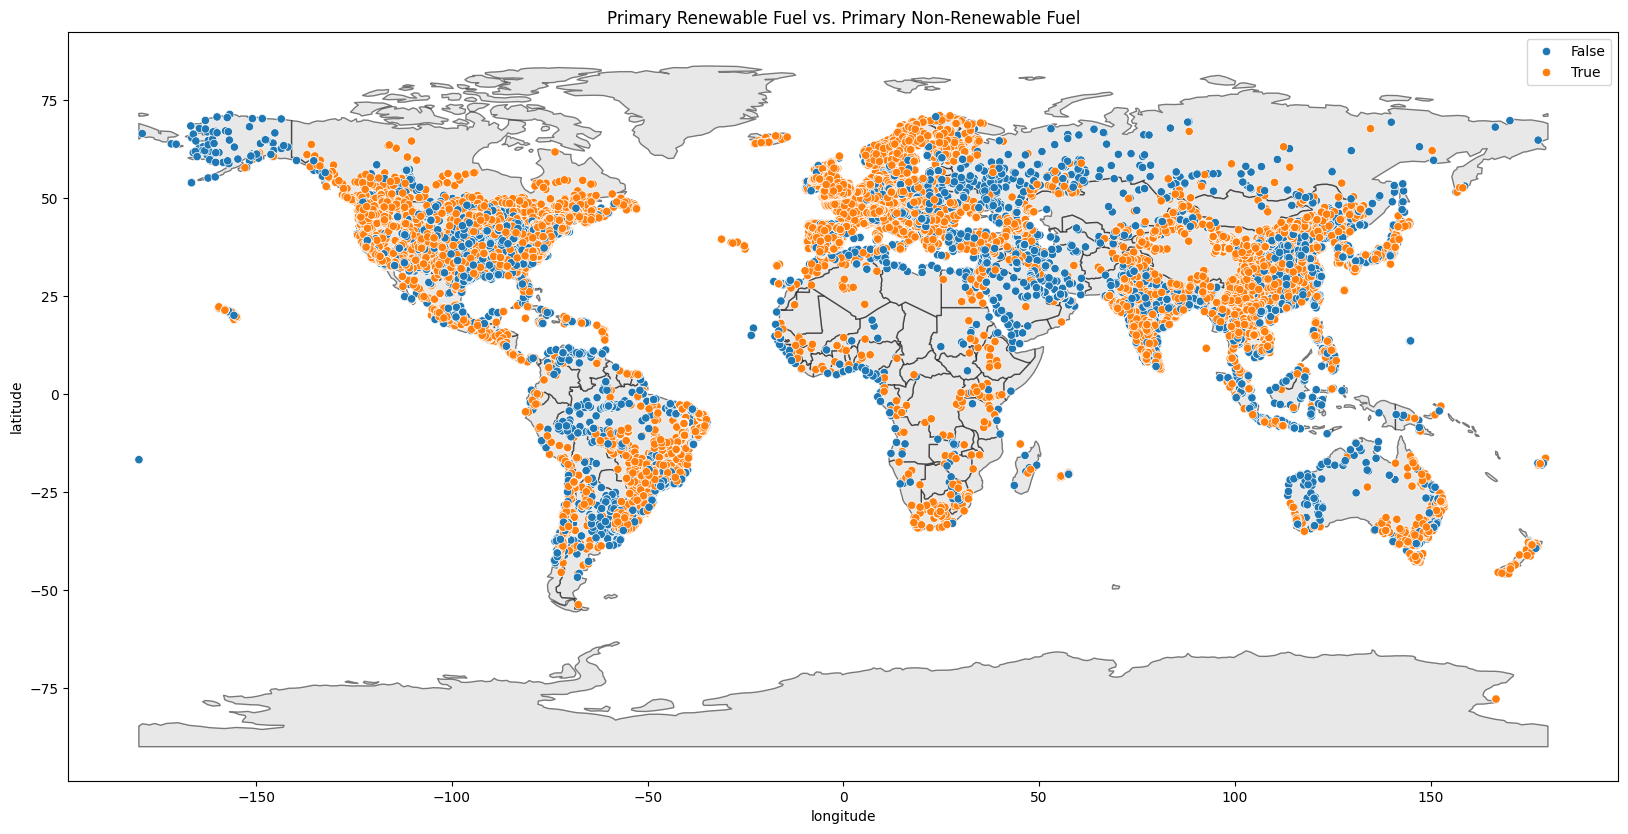

In [11]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
world.plot(
    ax=ax,
    color="lightgray",
    edgecolor="black",
    alpha=0.5
)
sns.scatterplot(data= gpp_data, y="latitude",x="longitude", hue="is_renewable", legend="auto")
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Primary Renewable Fuel vs. Primary Non-Renewable Fuel')
plt.show()

Now we take explore the locations that utilize renewable fuel as secondary fuel, indicating possible options for further expansion.

In [16]:
poss_renewables = gpp_data[gpp_data['possible_renewable'] == True]
len(poss_renewables)

172

C:\Users\farrj\AppData\Local\Temp\ipykernel_13068\3829271328.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


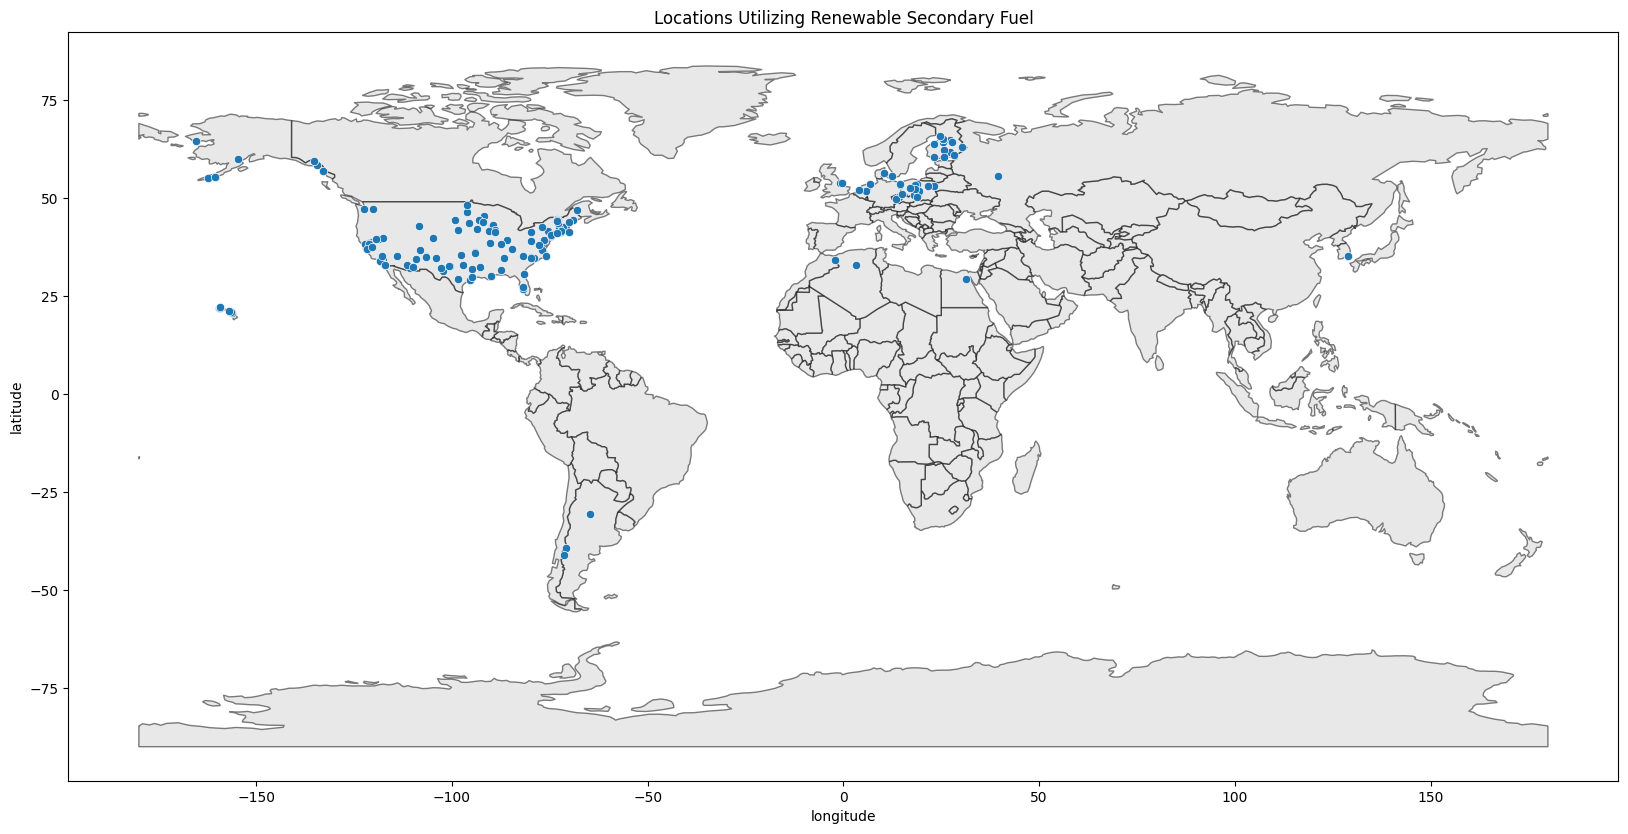

In [15]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
world.plot(
    ax=ax,
    color="lightgray",
    edgecolor="black",
    alpha=0.5
)


sns.scatterplot(data= poss_renewables, y="latitude",x="longitude", legend="auto")
#plt.legend(bbox_to_anchor=(1, 1))
plt.title('Locations Utilizing Renewable Secondary Fuel')
plt.show()

### Maybe see if there is a way to plot primary renewable and 2nd renewable together?

### Need to add plt title and y-axis label, graph explanation

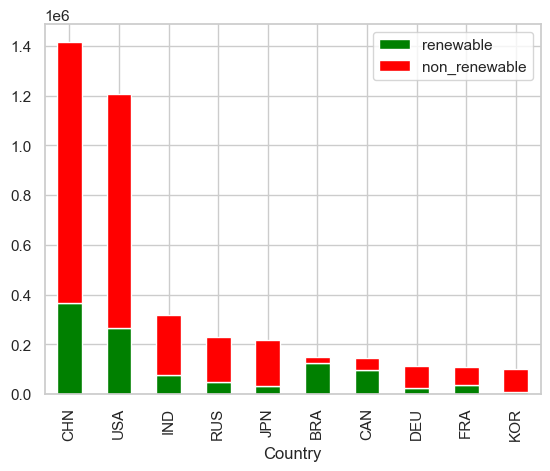

In [40]:
xtoplot_full = capacities["Country"]

data_splot_full =  pd.DataFrame(index = xtoplot_full, columns=['renewable', 'non_renewable'])

for country in xtoplot_full:
    temp = gpp_data[gpp_data["country"]==country]
    data_splot_full.loc[country, 'renewable'] = temp[temp["is_renewable"]]["capacity_mw"].sum()
    data_splot_full.loc[country, 'non_renewable'] = temp[~temp["is_renewable"]]["capacity_mw"].sum()
    data_splot_full.loc[country, 'country'] = country

sns.set(style="whitegrid")

xtoplot = xtoplot_full.iloc[:10]
data_splot = data_splot_full[:10]

data_splot.plot(kind = 'bar', stacked=True, color = ['green', 'red']);

### insert observation

### insert explanation for below code

In [43]:
percent_data = data_splot_full.copy()
temp = percent_data["non_renewable"] + percent_data["renewable"]
percent_data["renewable"] /= temp
percent_data["non_renewable"] /= temp
percent_data.head()

percent_data_melt = percent_data[:10]
percent_data_melt = pd.melt(percent_data_melt, id_vars=["country"])
percent_data_melt['country'] = pd.Categorical(percent_data_melt['country'], categories=xtoplot)
countryHDI = capacities[["Country", "Capacity (MW)", "HDI", "Population", "Growth Rate %"]]
percent_data_hdi_full = pd.merge(percent_data, countryHDI, left_index=True, right_on='Country', how='inner')

percent_data_hdi_full.drop(['Country', 'country'], axis=1, inplace=True)
percent_data_hdi_full

,renewable,non_renewable,Capacity (MW),HDI,Population,Growth Rate %
CHN,0.257828,0.742172,1415067.38,0.749,1387067142.857143,-0.458927
USA,0.219769,0.780231,1204638.05,0.933,328329953.0,NaN
IND,0.239683,0.760317,316088.546,0.638,1383112050.0,-0.983095
RUS,0.206504,0.793496,228220.05,0.826429,144163826.857143,NaN
JPN,0.157095,0.842905,215365.85,0.913857,127050571.428571,0.091311
...,...,...,...,...,...,...
GNB,0.0,1.0,18.237,0.473714,1834253.0,-2.127998
PSE,1.0,0.0,7.6,0.715143,4370926.285714,NaN
ATA,0.131579,0.868421,7.6,NaN,NaN,NaN
SUR,1.0,0.0,5.0,0.707286,581733.142857,-0.892442


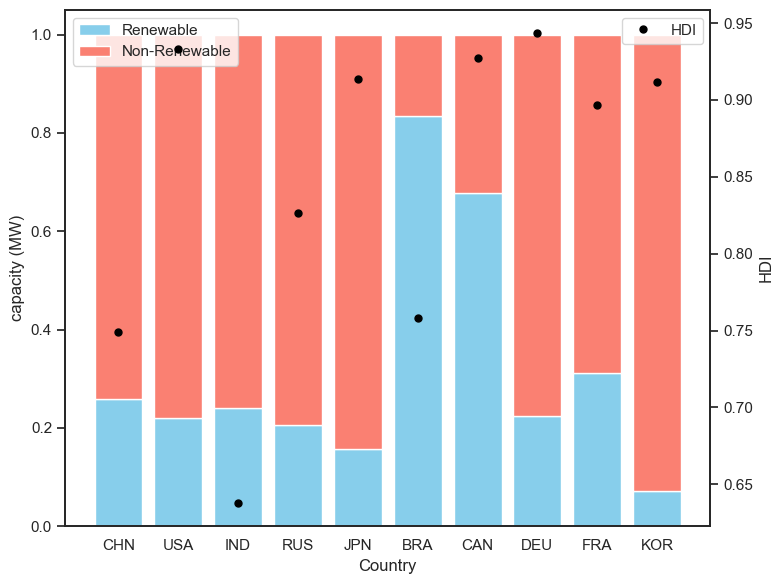

In [44]:
pastel_palette = sns.color_palette("pastel")

percent_data_hdi = percent_data_hdi_full[:10]
# Extract data for plotting
sns.set_style('white')
# sns.set_color_codes()
countries = percent_data_hdi.index
renewable = percent_data_hdi['renewable']
non_renewable = percent_data_hdi['non_renewable']
hdi = percent_data_hdi['HDI']

# Create stacked bar chart
fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.bar(countries, renewable, label='Renewable', color='skyblue')
ax1.bar(countries, non_renewable, bottom=renewable, label='Non-Renewable', color='salmon')

# Overlay HDI as points
ax2 = ax1.twinx()
ax2.plot(countries, hdi, marker='o', linestyle='', markersize=5, label='HDI', color='black')

# Set labels and legend
ax1.set_xlabel('Country')
ax1.set_ylabel('capacity (MW)')
ax2.set_ylabel('HDI')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show plot
plt.tight_layout()
plt.show()

### insert observation

### Do we want to do a similar graph for bottom 10 for comparison? Maybe a graph with population and renewable somehow?

In [14]:
### hard to answer our question

In [17]:
### conclusion